# Project: Analyzing the Impact of Gamification on Student Performance

## Introduction

Gamification, the use of game elements in non-game contexts, has gained popularity in educational settings. This project aims to analyze the impact of gamification on student performance using a dataset that includes information on gamification features and student grades.

In this notebook, we will go through the following steps:
1. Load and explore the dataset
2. Preprocess the data and perform exploratory data analysis (EDA)
3. Choose a machine learning model to analyze the impact of gamification
4. Train, evaluate, and interpret the model
5. Communicate findings and insights

Let's get started!


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind

### Load the dataset

In [2]:
file_path = 'Students_gamification_grades.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
data.head()

,Student_ID,Practice_Exam,Final_Exam,User,Avg_Grade_Q1,Avg_Grade_Q2,Avg_Grade_Q3,Avg_Grade_Q4,Avg_Grade_Q5,Avg_Grade_Q6,No_access_Q1,No_access_Q2,No_access_Q3,No_access_Q4,No_access_Q5,No_access_Q6
0,1046,9.33,7.98,1,6.00,10.0,10.0,10.0,0.0,8.0,1,1,1,1,0,1
1,1048,2.89,6.49,0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,1050,7.67,6.90,1,9.00,10.0,10.0,10.0,10.0,10.0,1,1,1,1,1,1
3,1052,4.97,7.69,1,6.00,9.0,5.0,4.0,9.0,4.0,2,2,2,1,1,2
4,1054,3.89,7.78,1,9.33,10.0,10.0,10.0,10.0,10.0,12,1,1,1,1,1


In [4]:
## Remove Rows with Null Values

# Drop rows where Practice_Exam or Final_Exam is null
data = data.dropna(subset=['Practice_Exam', 'Final_Exam'])


## Exam Changes Analysis

In this section, we'll compare the changes between `Practice_Exam` and `Final_Exam` for users who used gamification (`User == 1`) and those who didn't use gamification (`User == 0`).

### Data Preparation

We start by separating the data into two groups based on the `User` column.



In [5]:
# Separate the data into users who used gamification (User == 1) and those who didn't (User == 0)
users_with_gamification = data[data['User'] == 1].copy()
users_without_gamification = data[data['User'] == 0].copy()

In [6]:
# Calculate the changes between Practice_Exam and Final_Exam for each group
users_with_gamification['Exam_Change'] = users_with_gamification['Final_Exam'] - users_with_gamification['Practice_Exam']
users_without_gamification['Exam_Change'] = users_without_gamification['Final_Exam'] - users_without_gamification['Practice_Exam']

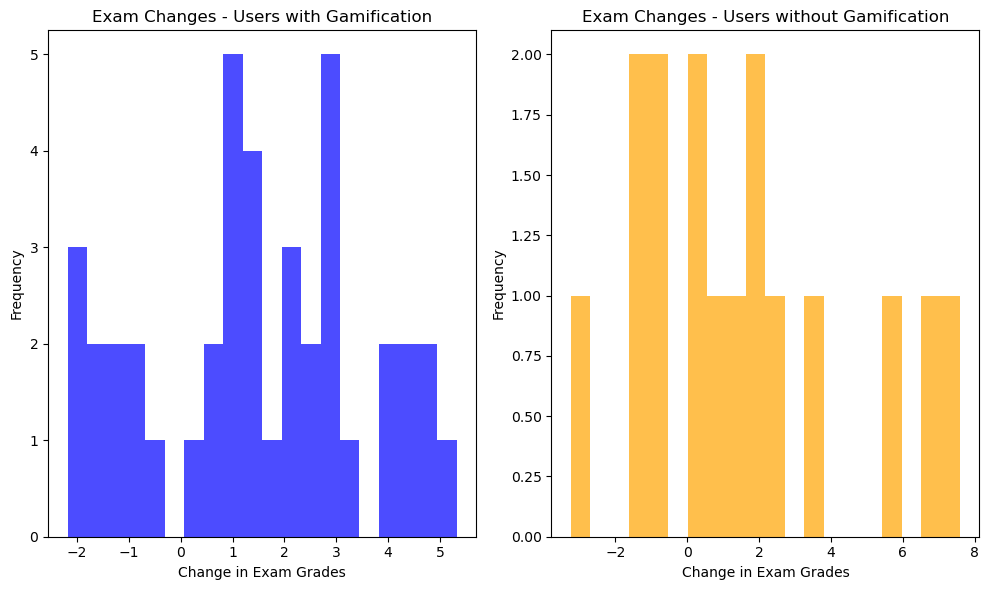

In [7]:
# Visualize the changes
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(users_with_gamification['Exam_Change'], bins=20, color='blue', alpha=0.7)
plt.title('Exam Changes - Users with Gamification')
plt.xlabel('Change in Exam Grades')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(users_without_gamification['Exam_Change'], bins=20, color='orange', alpha=0.7)
plt.title('Exam Changes - Users without Gamification')
plt.xlabel('Change in Exam Grades')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

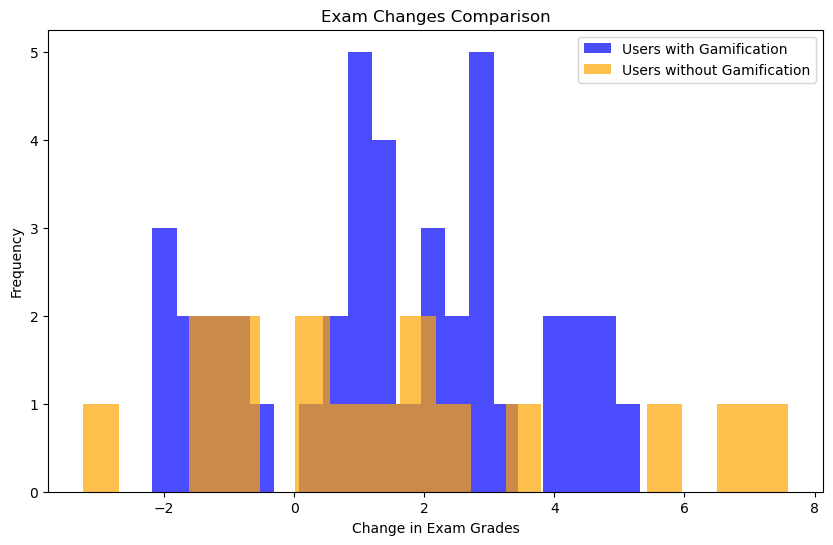

In [8]:
# Visualize the changes for both groups on the same chart
plt.figure(figsize=(10, 6))

plt.hist(users_with_gamification['Exam_Change'], bins=20, color='blue', alpha=0.7, label='Users with Gamification')
plt.hist(users_without_gamification['Exam_Change'], bins=20, color='orange', alpha=0.7, label='Users without Gamification')

plt.title('Exam Changes Comparison')
plt.xlabel('Change in Exam Grades')
plt.ylabel('Frequency')
plt.legend()

plt.show()

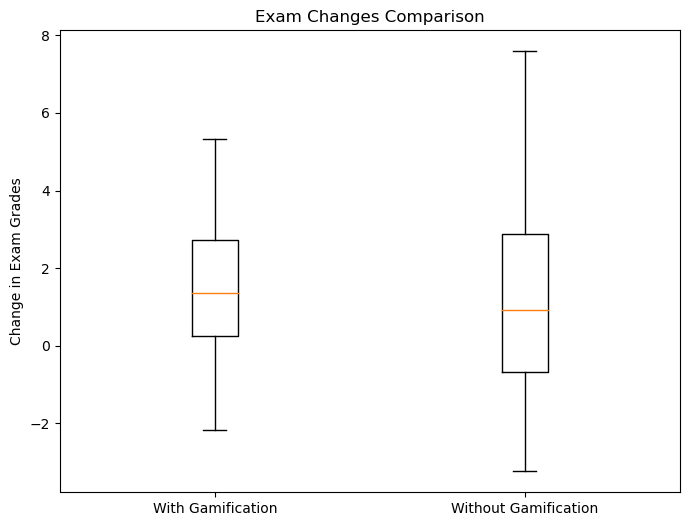

In [9]:
# Visualize the distribution using box plots
plt.figure(figsize=(8, 6))
plt.boxplot([users_with_gamification['Exam_Change'], users_without_gamification['Exam_Change']], labels=['With Gamification', 'Without Gamification'])
plt.title('Exam Changes Comparison')
plt.ylabel('Change in Exam Grades')
plt.show()

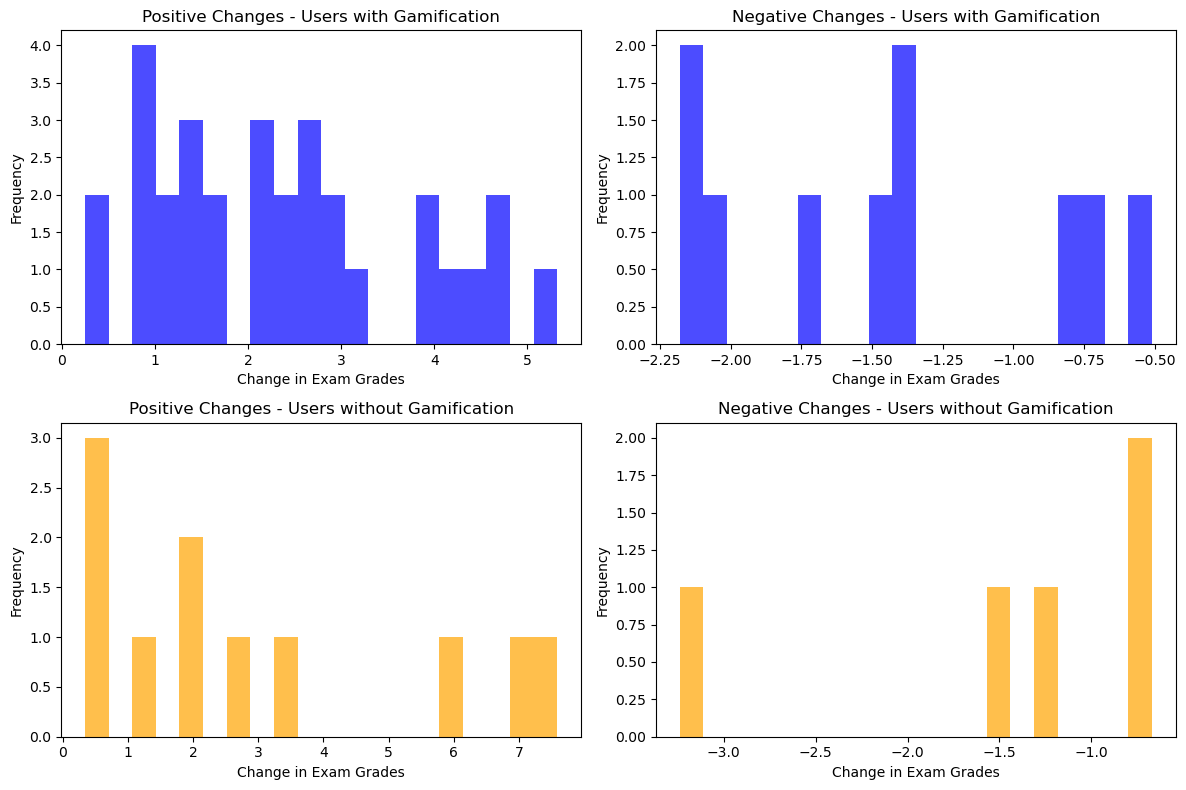

In [10]:
# Separate positive and negative changes for users with gamification
positive_changes_with_gamification = users_with_gamification[users_with_gamification['Exam_Change'] > 0]['Exam_Change']
negative_changes_with_gamification = users_with_gamification[users_with_gamification['Exam_Change'] < 0]['Exam_Change']

# Separate positive and negative changes for users without gamification
positive_changes_without_gamification = users_without_gamification[users_without_gamification['Exam_Change'] > 0]['Exam_Change']
negative_changes_without_gamification = users_without_gamification[users_without_gamification['Exam_Change'] < 0]['Exam_Change']

# Visualize positive and negative changes separately
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(positive_changes_with_gamification, bins=20, color='blue', alpha=0.7)
plt.title('Positive Changes - Users with Gamification')
plt.xlabel('Change in Exam Grades')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(negative_changes_with_gamification, bins=20, color='blue', alpha=0.7)
plt.title('Negative Changes - Users with Gamification')
plt.xlabel('Change in Exam Grades')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(positive_changes_without_gamification, bins=20, color='orange', alpha=0.7)
plt.title('Positive Changes - Users without Gamification')
plt.xlabel('Change in Exam Grades')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(negative_changes_without_gamification, bins=20, color='orange', alpha=0.7)
plt.title('Negative Changes - Users without Gamification')
plt.xlabel('Change in Exam Grades')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Statistical Analysis of Exam Changes

In this section of the code, we perform a statistical analysis to compare the changes in exam grades between two groups: users with gamification (`User == 1`) and users without gamification (`User == 0`).

### Two-Sample T-Test:

The two-sample t-test is employed to assess whether there is a significant difference in the mean exam changes between the two groups. The results of the t-test are as follows:

- **T-Statistic:** The t-statistic measures the difference in means relative to the variability within each group. In our context, a negative t-statistic indicates that, on average, users with gamification had slightly lower changes in exam grades compared to users without gamification.

- **P-Value:** The p-value represents the probability of observing the calculated t-statistic if there is no true difference between the groups. In this case, the high p-value suggests that we do not have enough evidence to reject the null hypothesis of no significant difference in exam changes.

### Alternative Method for Cohen's d Calculation:

Cohen's d is a measure of effect size, indicating the standardized difference between two means. In this analysis, we calculate Cohen's d using an alternative method:

- **Mean Difference:** We compute the mean difference in exam changes between the two groups.

- **Pooled Standard Deviation:** The pooled standard deviation considers the variability within each group, providing a standardized measure of the effect size.

- **Cohen's d:** The calculated Cohen's d quantifies the practical significance of the observed difference. A negative Cohen's d indicates a negative effect, suggesting that, on average, users with gamification had slightly smaller changes in exam grades.

These statistical measures help us understand both the significance and practical importance of the observed differences in exam changes between users with and without gamification.


In [11]:
# Positive changes
positive_changes_with_gamification = users_with_gamification[users_with_gamification['Exam_Change'] > 0]['Exam_Change']
positive_changes_without_gamification = users_without_gamification[users_without_gamification['Exam_Change'] > 0]['Exam_Change']

# Negative changes
negative_changes_with_gamification = users_with_gamification[users_with_gamification['Exam_Change'] < 0]['Exam_Change']
negative_changes_without_gamification = users_without_gamification[users_without_gamification['Exam_Change'] < 0]['Exam_Change']

# Perform t-tests for positive changes
t_stat_positive, p_value_positive = ttest_ind(positive_changes_with_gamification, positive_changes_without_gamification)

# Perform t-tests for negative changes
t_stat_negative, p_value_negative = ttest_ind(negative_changes_with_gamification, negative_changes_without_gamification)

# Print t-test results for positive changes
print("Positive Changes:")
print(f'T-statistic: {t_stat_positive}')
print(f'P-value: {p_value_positive}')

# Print t-test results for negative changes
print("\nNegative Changes:")
print(f'T-statistic: {t_stat_negative}')
print(f'P-value: {p_value_negative}')


Positive Changes:
T-statistic: -1.0178171331447152
P-value: 0.31488186615977726

Negative Changes:
T-statistic: 0.11814838984581749
P-value: 0.9077561207073163


In [12]:
# Calculate Cohen's d for positive changes
mean_diff_positive = positive_changes_with_gamification.mean() - positive_changes_without_gamification.mean()
pooled_std_positive = ((positive_changes_with_gamification.std()**2 + positive_changes_without_gamification.std()**2) / 2)**0.5
cohen_d_positive = mean_diff_positive / pooled_std_positive
print(f'\nCohen\'s d for Positive Changes: {cohen_d_positive}')

# Calculate Cohen's d for negative changes
mean_diff_negative = negative_changes_with_gamification.mean() - negative_changes_without_gamification.mean()
pooled_std_negative = ((negative_changes_with_gamification.std()**2 + negative_changes_without_gamification.std()**2) / 2)**0.5
cohen_d_negative = mean_diff_negative / pooled_std_negative
print(f'Cohen\'s d for Negative Changes: {cohen_d_negative}')


Cohen's d for Positive Changes: -0.30174450889403287
Cohen's d for Negative Changes: 0.05830565146850693


## Interpretation of T-Tests and Cohen's d for Positive and Negative Changes

### Positive Changes:

- **T-Statistic:** -1.0178
- **P-Value:** 0.3149
- **Cohen's d:** -0.3017

#### Interpretation:

The t-test for positive changes shows a negative t-statistic, suggesting that, on average, users with gamification had slightly smaller positive changes compared to users without gamification. However, the p-value of 0.3149 is higher than the significance level of 0.05, indicating no significant difference in positive changes. The Cohen's d value of -0.3017 suggests a small to medium effect size, implying a limited practical significance.

### Negative Changes:

- **T-Statistic:** 0.1181
- **P-Value:** 0.9078
- **Cohen's d:** 0.0583

#### Interpretation:

The t-test for negative changes shows a positive t-statistic, indicating no significant difference in negative changes between users with and without gamification (supported by the high p-value of 0.9078). The Cohen's d value of 0.0583 suggests a very small effect size, indicating minimal practical significance in the difference in negative changes.

### Summary:

While the t-tests provide insights into statistical significance, the effect sizes (Cohen's d) suggest that the observed differences in both positive and negative changes may not be practically significant due to their small to medium magnitudes. It's crucial to consider both statistical significance and effect size in the interpretation of results.


## Predicting Final Exam Scores based on Practice Exam and Gamification Usage

In this section, we aim to create a predictive model that estimates the Final Exam scores based on the Practice Exam scores and whether a user uses gamification or not. The goal is to understand how the usage of gamification may impact the final exam performance.

### Data Selection:

We load the dataset and select relevant columns, including 'User' (indicating gamification usage), 'Practice_Exam', and 'Final_Exam'.

### Preprocessing:

We split the dataset into training, validation, and test sets to facilitate model training, hyperparameter tuning, and evaluation.



Mean Squared Error on Validation Set: 1.9926934816490203
R-squared on Validation Set: -0.5682054382452792


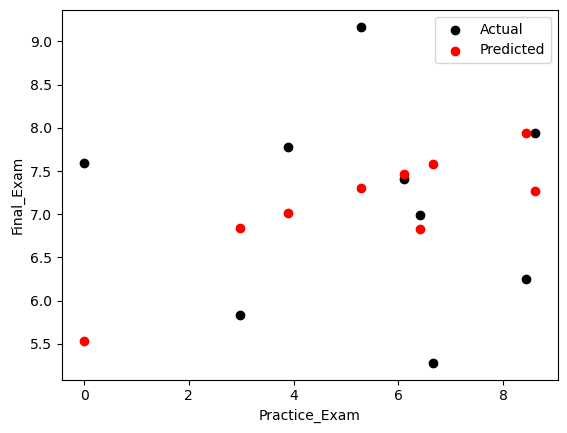

In [13]:
# Load the dataset
df = data

# Select relevant columns
df = df[['User', 'Practice_Exam', 'Final_Exam']]

# Separate features and target variable
X = df[['User', 'Practice_Exam']]
y = df['Final_Exam']

# Preprocessing: Splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Modeling: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error on Validation Set: {mse}')
print(f'R-squared on Validation Set: {r2}')

# Visualization: Actual vs. Predicted
plt.scatter(X_val['Practice_Exam'], y_val, color='black', label='Actual')
plt.scatter(X_val['Practice_Exam'], y_val_pred, color='red', label='Predicted')
plt.xlabel('Practice_Exam')
plt.ylabel('Final_Exam')
plt.legend()
plt.show()
